In [76]:
import pandas as pd
import seaborn as sns
import warnings 

In [77]:
warnings.filterwarnings("ignore")

# unsupervised learning


In [78]:
df = pd.read_csv('cars.csv')

In [79]:
df.head()
# df.info()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [80]:
from sklearn.impute import SimpleImputer 
cleanNull = SimpleImputer(strategy="mean") # Mengahapus nilai null menggunakan strategi mean
df["engine_capacity"] = cleanNull.fit_transform(df[["engine_capacity"]])

df.isna().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

In [81]:
from sklearn.preprocessing import StandardScaler


In [39]:
dfsub=df[['odometer_value','engine_capacity']]


In [40]:
ss = StandardScaler()

In [41]:
xscaled = ss.fit_transform(dfsub)

# k-means clustering

In [42]:
from sklearn.cluster import KMeans


In [43]:
modelK = KMeans(n_clusters=3)

In [44]:
modelK.fit(xscaled)

KMeans(n_clusters=3)

In [45]:
labels= modelK.labels_

print(labels)

# CROSS TAB UNTUK MEMBANDINGKAN ANTAR CLUSTER

In [65]:
# buat dataframe dengan label dan sepesies sebagai iris sebagai kolom
df_kmeans= pd.DataFrame({'labels':labels,'engine type':df.engine_type})

In [67]:
#buat crosstab
ct1 = pd.crosstab(df_kmeans['labels'],df_kmeans['engine type'])

In [68]:
print (ct1)

engine type  diesel  electric  gasoline
labels                                 
0              3787        10     13567
1              7834         0      9084
2              1253         0      2996


# MELIHAT CENTROID

In [69]:
import matplotlib.pyplot as plt

In [70]:
plt.style.use('ggplot')

In [71]:
# untuk mengambil smeua baris pada kolom tertentu
xs = xscaled[:,0]
ys = xscaled[:,1]

In [72]:
# menampung semua kordinat dari semua centroid
centroids = modelK.cluster_centers_

In [73]:
# pisahkan centroid kordinat x dan kordinat y
centroidsX = centroids[:,0]
centroidsY = centroids [:,1]

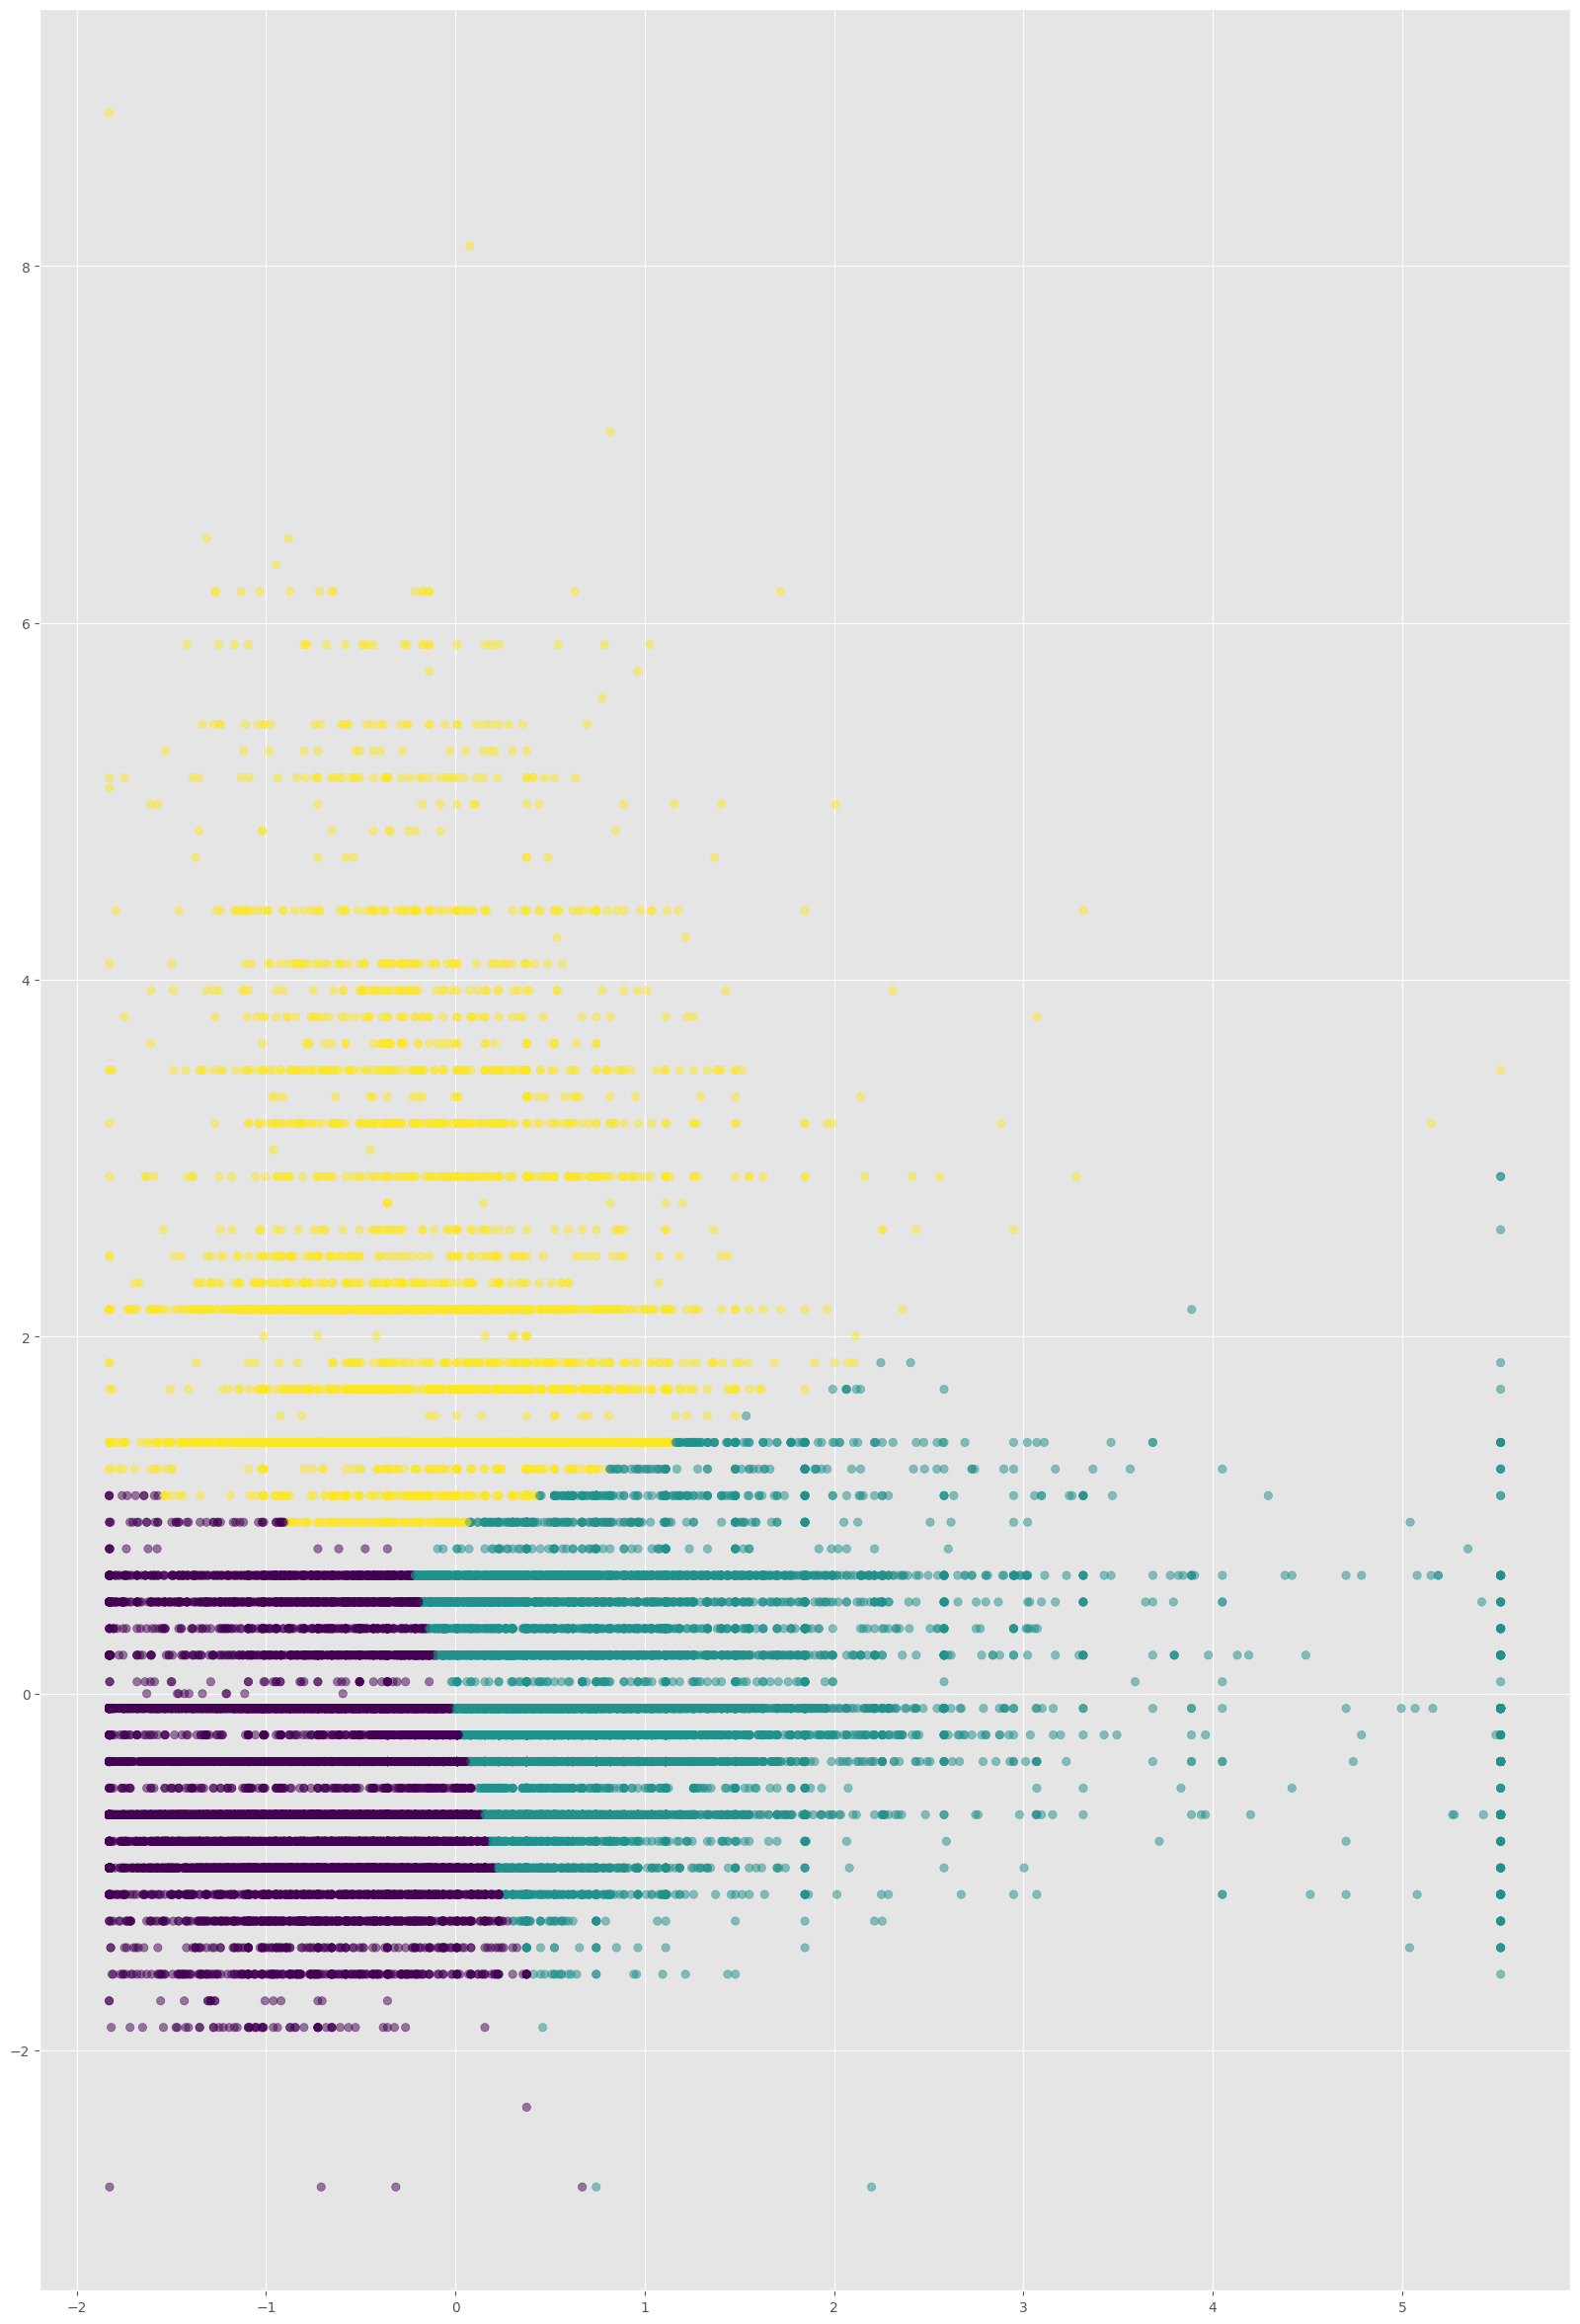

In [74]:
# visualisasi cluster
plt.figure(figsize =(20,30))
plt.scatter(xs,ys,alpha=0.5, c=labels)

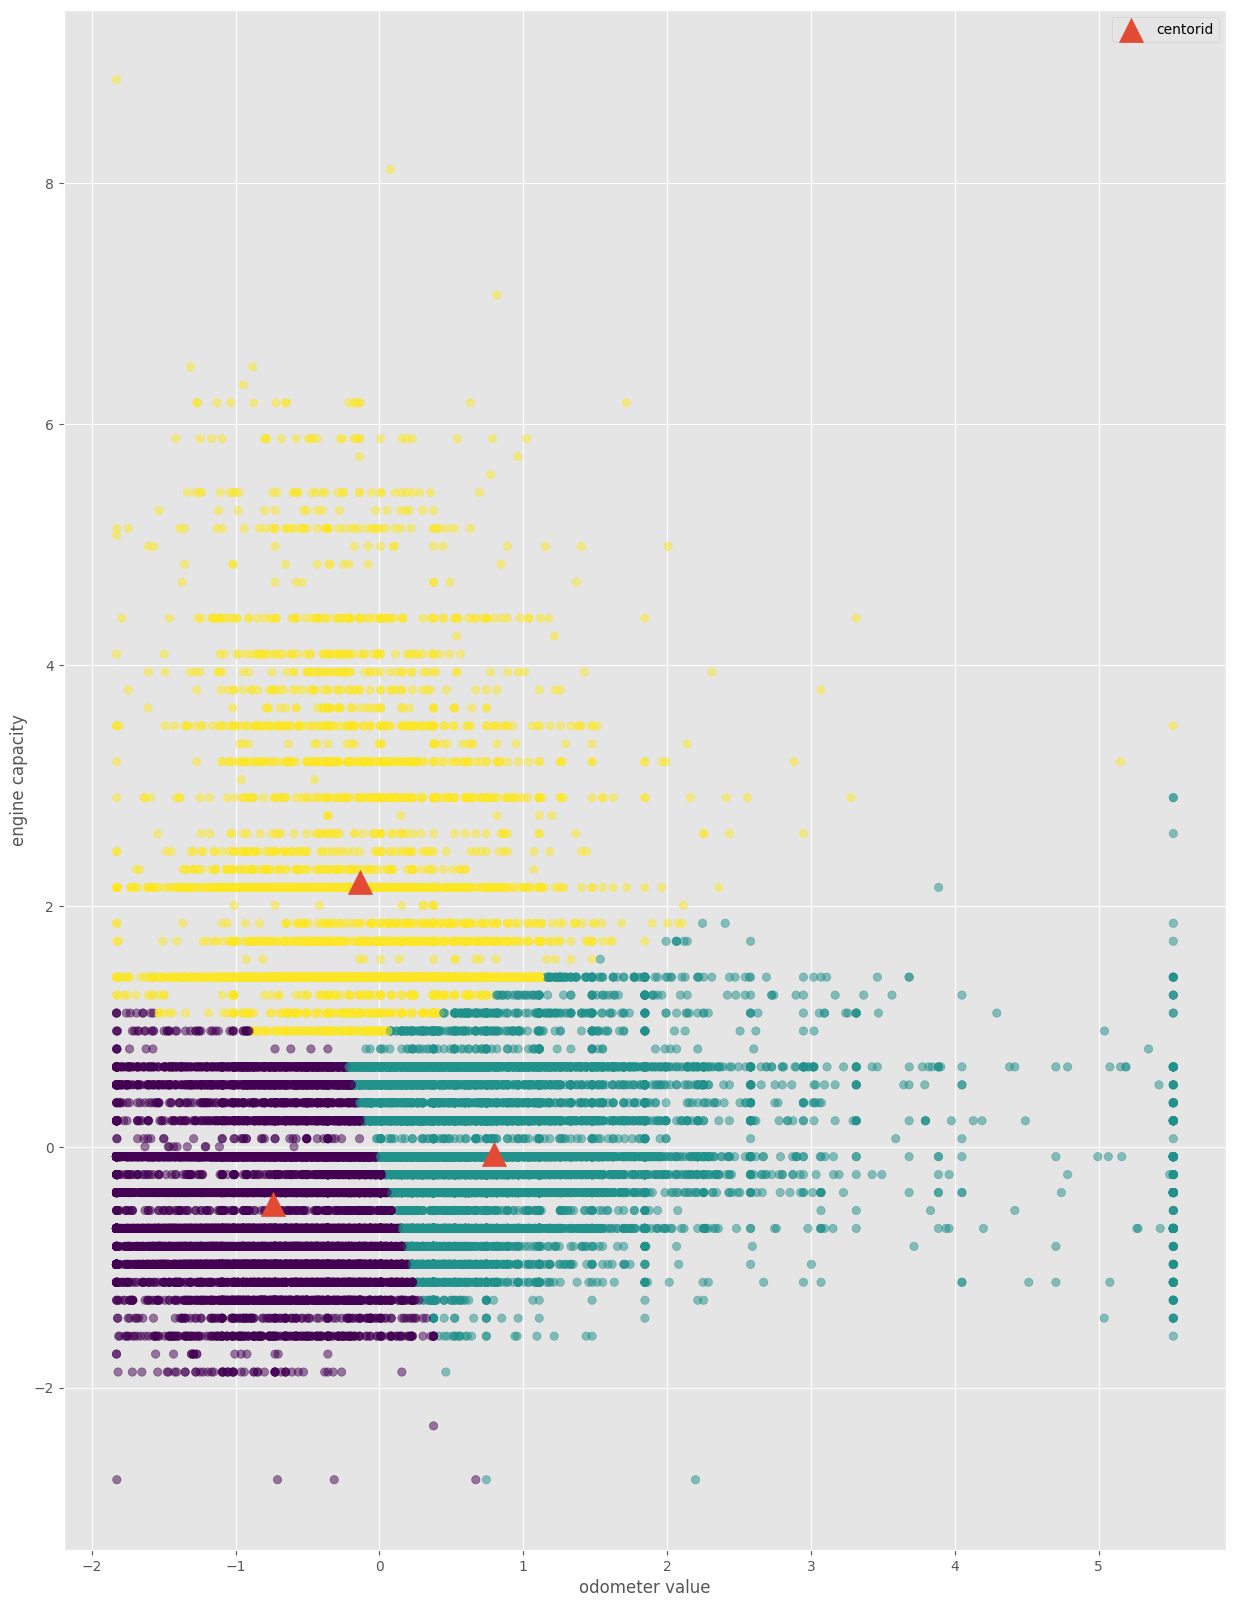

In [75]:
# titik data x dan y tiap cluster
plt.figure(figsize =(15,20))

plt.scatter(xs,ys,alpha=0.5,c=labels)
#titik titik centroid
plt.scatter(centroidsX,centroidsY,label="centorid",marker="^",s=300)

#beri label
plt.xlabel("odometer value")
plt.ylabel("engine capacity")

plt.legend()
plt.show()